In [15]:
from skimage.filters import threshold_otsu
from skimage.io import imread, imshow

In [1]:
##### Copyright 2020 Google LLC. All Rights Reserved.

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
# A fast numpy reference implementation of GHT, as per
# "A Generalization of Otsu's Method and Minimum Error Thresholding"
# Jonathan T. Barron, ECCV, 2020


import numpy as np

csum = lambda z: np.cumsum(z)[:-1]
dsum = lambda z: np.cumsum(z[::-1])[-2::-1]
argmax = lambda x, f: np.mean(x[:-1][f == np.max(f)])  # Use the mean for ties.
clip = lambda z: np.maximum(1e-30, z)

def preliminaries(n, x):
    """Some math that is shared across multiple algorithms."""
    assert np.all(n >= 0)
    x = np.arange(len(n), dtype=n.dtype) if x is None else x
    assert np.all(x[1:] >= x[:-1])
    w0 = clip(csum(n))
    w1 = clip(dsum(n))
    p0 = w0 / (w0 + w1)
    p1 = w1 / (w0 + w1)
    mu0 = csum(n * x) / w0
    mu1 = dsum(n * x) / w1
    d0 = csum(n * x**2) - w0 * mu0**2
    d1 = dsum(n * x**2) - w1 * mu1**2
    return x, w0, w1, p0, p1, mu0, mu1, d0, d1

def GHT(n, x=None, nu=0, tau=0, kappa=0, omega=0.5):
    assert nu >= 0
    assert tau >= 0
    assert kappa >= 0
    assert omega >= 0 and omega <= 1
    x, w0, w1, p0, p1, _, _, d0, d1 = preliminaries(n, x)
    v0 = clip((p0 * nu * tau**2 + d0) / (p0 * nu + w0))
    v1 = clip((p1 * nu * tau**2 + d1) / (p1 * nu + w1))
    f0 = -d0 / v0 - w0 * np.log(v0) + 2 * (w0 + kappa *      omega)  * np.log(w0)
    f1 = -d1 / v1 - w1 * np.log(v1) + 2 * (w1 + kappa * (1 - omega)) * np.log(w1)
    return argmax(x, f0 + f1), f0 + f1

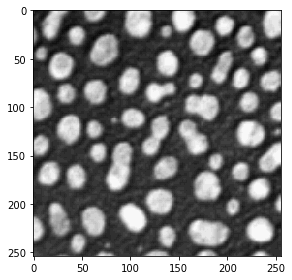

In [16]:
image = imread("C:/structure/data/blobs.tif")
imshow(image)

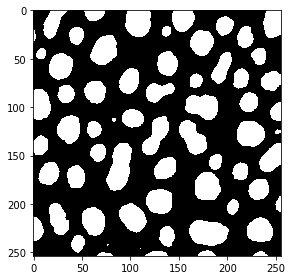

In [18]:
skimage_otsu = image > threshold_otsu(image)
imshow(skimage_otsu)

In [55]:
from n

Threshold 243.29411764705884


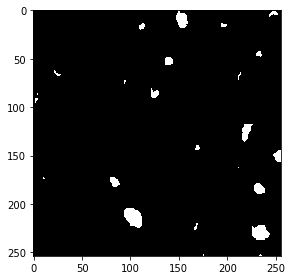

In [56]:
ght_otsu = generalized_histogram_threshold(image, nu=128, tau=0.00001)
imshow(ght_otsu)

In [11]:
Otsu(hist, hist_center)

(116.0,
 array([7.83847032e+11, 9.69760568e+12, 1.63290584e+13, 1.79016701e+13,
        1.83531060e+13, 1.79576467e+13, 1.64762998e+13, 1.30689251e+13,
        6.51338978e+12]))